In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

/home/vturino/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
dr = 3300 - 2900
delta = 50 #degrees
h = 4.e3 # channel thickness
eta = 5.e19 # viscosity
g = 9.81

In [3]:
sigma_b = dr*g*h*np.sin(np.deg2rad(delta)) # basal shear stress
print("Basal shear stress: ", sigma_b/1.e6, "MPa")

Basal shear stress:  12.02383357919548 MPa


In [4]:
cttV_name = "kinematic_mu0.13_basalt7.5km_sed1km_cttV"
cttV_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{cttV_name}/txt_files"
plt_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{cttV_name}"

cr = pd.read_csv(f"{cttV_loc}/2D_v.txt", delim_whitespace=True)

/tmp/ipykernel_1949399/4273752947.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cr = pd.read_csv(f"{cttV_loc}/2D_v.txt", delim_whitespace=True)


In [8]:
scale_factor = (1 / 100) / (365.25 * 24 * 3600)  # Convert cm to m and years to seconds
cr["cr_ms"] = cr["conv_rate"] * scale_factor
cr.iloc[0] = cr.iloc[1]
cr["time"].iloc[0] = 0.0

/tmp/ipykernel_1949399/2632583533.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cr["time"].iloc[0] = 0.0


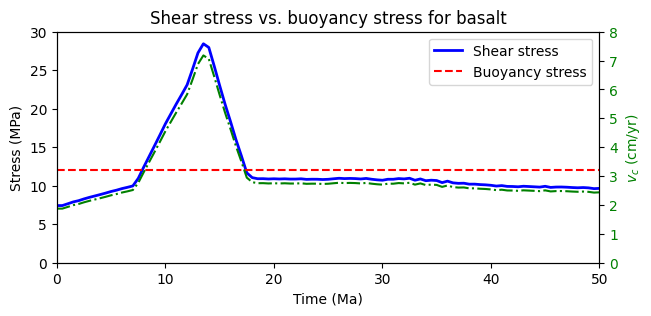

In [10]:
tau = cr["cr_ms"] * eta/h
tau[0] = tau[1]
fig, ax1 = plt.subplots(figsize=(7,3))

# Plot shear stress and buoyancy stress
ax1.plot(cr["time"]/1.e6, tau/1.e6, label="Shear stress", color='b', linewidth=2)
ax1.axhline(sigma_b/1.e6, color='r', linestyle='--', label="Buoyancy stress")
ax1.set_xlabel("Time (Ma)")
ax1.set_ylabel("Stress (MPa)")
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 30)
ax1.legend(loc="upper right")

# Duplicate y-axis for conv_rate
ax2 = ax1.twinx()
ax2.plot(cr["time"]/1.e6, cr["conv_rate"], color='g', linestyle = "-.")
ax2.set_ylabel("$v_{c}$ (cm/yr)", color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 8)

plt.title("Shear stress vs. buoyancy stress for basalt")

plt.savefig(f"{plt_loc}/shear_stress_vs_conv_rate.pdf", bbox_inches='tight')
